# Correlation 

## Configure python environment and import needed libraries
 1. enable MATLAB emulation mode (%pylab)
 1. Import Pandas statistics library, and call it as pd from now on

In [34]:
%pylab 
import pandas as pd


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Read the sample data from csv-file

The file contains sound measurements near Santavuori wind park in June 2016. The file contains five columns, the first column is a timestamp, the four following columns describe certain properties of the sound:
- AM = amplitude modulation (pulsating character)
- LL = Linearly weighted sound pressure level (SPL)
- LC = C-weighted SPL
- LA = A-weighted SPL

You may study more about different [weighthings from Wikipedia](https://en.wikipedia.org/wiki/A-weighting) if interested.

`,AM,LL,LC,LA
2017-06-01T00:00:00,9.5399842997,62.7491815241,44.4971670418,34.8771053292
2017-06-01T00:00:10,8.41053731201,65.9948428886,44.7835772035,36.012519387
2017-06-01T00:00:20,6.1813068034,62.7160571082,44.0735043454,35.0533055272
2017-06-01T00:00:30,6.29460558605,62.915184801,44.618351916,34.8190087386`

Read comma separated values from Santavuori_sample.csv file, using read_csv function from pandas module. The result will be a Pandas data frame, called d, which has 999 rows and 4 colum
First three rows of data can be shown using head-function, which is included in each pandas dataframe.


## Fancier data parsing


CSV-reading function can also parse the timestamp values if needed. To do so you need to specify in which column the date and time parsing is tried. Note that column numbering starts from zero. The colun index is actually a Python list, and it may contain many columns, like [0,1,5]. In the example below, only the first column (whose index is zero) will be parsed.

Furthermore, the first column, which is parsed as timestams, is also used as an index of the dataframe. In previous example, the index was not given, and therefore Pandas created an artificial index using simple row numbers.

Note that the data frame d has now one column less, because there is no artificial index column any longer.

In [11]:
d=pd.read_csv('data/Santavuori_sample.csv', parse_dates=[0], index_col=0)
print("Data shape of the data frame d is ", d.shape)
d.head(3)

Data shape of the data frame d is  (999, 4)


,AM,LL,LC,LA
2017-06-01 00:00:00,9.539984,62.749182,44.497167,34.877105
2017-06-01 00:00:10,8.410537,65.994843,44.783577,36.012519
2017-06-01 00:00:20,6.181307,62.716057,44.073504,35.053306


## Correlation
Correlation between each variable can be easily calculated using corr-function, which is build in the pandas dataframe. The default mathod is Pearsson correlation

In [12]:
d.corr()

,AM,LL,LC,LA
AM,1.000000,0.646448,-0.160820,-0.253381
LL,0.646448,1.000000,0.176244,-0.126415
LC,-0.160820,0.176244,1.000000,0.678162
LA,-0.253381,-0.126415,0.678162,1.000000


It is easy to use other correlation coefficients as well, such as spearman or kendall.

In [13]:
d.corr(method='spearman')

,AM,LL,LC,LA
AM,1.000000,0.499386,-0.129000,-0.251718
LL,0.499386,1.000000,0.199532,-0.117988
LC,-0.129000,0.199532,1.000000,0.788282
LA,-0.251718,-0.117988,0.788282,1.000000


Correlation between each variable, can be also studied visually by using scatter plots. In the scatter plots, the diagonals would be uninformative, so it is usefull to show something else there. It is typical to show there the distribution of values, for example using [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) (kde). 

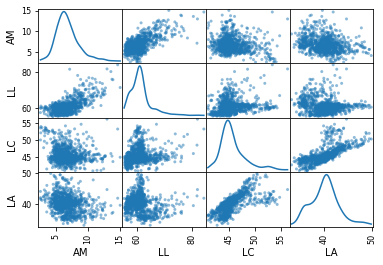

In [14]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(d, diagonal='kde');


Unfortunately the correlation function in Pandas, does not provide p-values, the significance of the correlation. If you need the P-values, use the pearsonr-function from stats package of Scientific Python

In [39]:
from scipy.stats import pearsonr

n=len(d)
r,p=pearsonr(d.LC, d.LA)
if p<0.05:
    sig='significant'
else:
    sig='not significant'
print("Correlation between LC and LA is %5.2f and p-value is %7.6f, n=%3d, which is %s" % (r,p,n,sig))

r,p=pearsonr(d.AM, d.LA)
if p<0.05:
    sig='significant'
else:
    sig='not significant'
print("Correlation between AM and LA is %5.2f and p-value is %7.6f, n=%3d, which is %s" % (r,p, n, sig))

n=20
r,p=pearsonr(d.AM[:n], d.LA[:n])
if p<0.05:
    sig='significant'
else:
    sig='not significant'
print("Correlation between AM and LA is %5.2f and p-value is %7.6f, n=%3d, which is %s" % (r,p,n, sig))


Correlation between LC and LA is  0.68 and p-value is 0.000000, n=999, which is significant
Correlation between AM and LA is -0.25 and p-value is 0.000000, n=999, which is significant
Correlation between AM and LA is  0.26 and p-value is 0.261073, n= 20, which is not significant


## Regression

## Fitting a regression line (or curve) in the data
There is no ready made plotting function for fitting a curve in the data, so let's use general purpose curve_fit method from the optimization library.

This is Ordinary Least Squares (OLS) fit of a line to the data in general form  $$y_i=\beta_i1 x_1 + \beta_2 x_i2 + \beta_3 x_i3 + \epsilon_i$$

## Coefficient of determination = Rsquared

The coefficient of determination defines now large portion of the variance of the dependent variable, the regression model can explain. For Ordinary Least mean Squares regression models (OLS) it is the  same as the square of the correlation coefficient

In [19]:
r=d.LA.corr(d.LC)  # Pearsson correlation coefficient
Rsquared=sum((f(d.LA, kk, c)-d.LC.mean())**2) / sum((d.LC-d.LC.mean())**2)  # Determination coefficient
print("Rsquared: %f = %f" % (Rsquared, r**2))  # R squared is r**2

# The result is that only less than half of the variance is explained by the model, so 
# there are also other variables than the independent variable affecting to the 
# dependent variable 


Rsquared: 0.459904 = 0.459904


## Regression model using Ordinary Least Squares (OLS) model from statsmodels library

Instead of performing explicite curve fitting, you can also use the statsmodel library to calculate regression model very easily.

In [22]:
import statsmodels.formula.api as smf

print("\nOrdinary Linear Regression model for predicting LC from LA")
model = smf.ols(formula="LC ~ LA", data=d).fit()
print(model.params)



Ordinary Linear Regression model for predicting LC from LA
Intercept    22.764895
LA            0.569569
dtype: float64


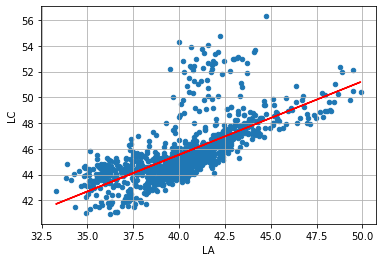

In [23]:


d.plot.scatter('LA', 'LC')
plot(d.LA, model.predict(d.LA), 'red')
# Then we can add some labels for X and Y axes, and plot the grid
xlabel('LA')
ylabel(r'LC')
grid()


In [24]:
print model.summary()


------> print(model.summary())
                            OLS Regression Results                            
Dep. Variable:                     LC   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     849.0
Date:                Thu, 24 Sep 2020   Prob (F-statistic):          1.61e-135
Time:                        21:23:51   Log-Likelihood:                -1964.4
No. Observations:                 999   AIC:                             3933.
Df Residuals:                     997   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7649

## Polynomial regression
If the dependency is polynomial, it may be worth trying polynomial regression (not in this case though).

In [28]:
import statsmodels.formula.api as sm

print("\nOrdinary Linear Regression model for predicting LC from LA")
model = sm.ols(formula="LC ~ LA + I(LA ** 2.0) ", data=d).fit()
print(model.params)

print("")
# Generate a dataframe for testdata, which has one column whose column name is 'LA'
testdata=pd.DataFrame(data=linspace(d.LA.min(), d.LA.max(), 100), columns=['LA'])



Ordinary Linear Regression model for predicting LC from LA
Intercept       41.528143
LA              -0.357468
I(LA ** 2.0)     0.011395
dtype: float64



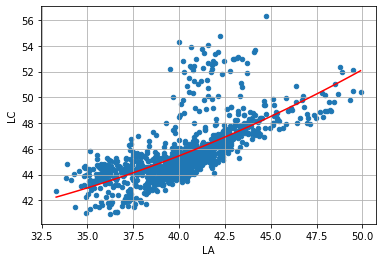

In [29]:

# Then plot the original data as scatter plot and the data predicted by the model
# from the test data
d.plot.scatter('LA', 'LC')
plot(testdata.LA, model.predict(testdata), 'red')

# Then we can add some labels for X and Y axes, and plot the grid
xlabel('LA')
ylabel(r'LC')
grid()


In [31]:
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                     LC   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     429.9
Date:                Thu, 24 Sep 2020   Prob (F-statistic):          2.48e-135
Time:                        21:24:36   Log-Likelihood:                -1961.3
No. Observations:                 999   AIC:                             3929.
Df Residuals:                     996   BIC:                             3943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.5281      7.483      5.550   

Note that the polynomial regression did not provide significantly better solution than linear model, since Rsquared is only a little better, while the p-values of the coefficients are worse than what they were for the corresponding linear model. According to Occam's razor principle, the simpler model is better, so the polynomial regression model should be abandonded, in this case.